In [1]:
import os
import pandas as pd
import numpy as np
import re
import math
import matplotlib.pyplot as plt

In [2]:
# Define column combinations to filter
column_sets = [
    ("Ch_name", "Subscriptions"),
    ("Youtuber", "subscribers")
]

# Store filtered dataframes
filtered_dfs = []

In [66]:
# Get all CSV files in the current directory
csv_files = [f for f in os.listdir('.') if f.endswith('.csv')]
csv_files

['gross_500.csv',
 'most_subscribed_youtube_channels.csv',
 'top_500.csv',
 'usa_top_500.csv']

In [67]:
for file in csv_files:
    try:
        df = pd.read_csv(file)

        for col1, col2 in column_sets:
            if col1 in df.columns and col2 in df.columns:
                filtered_df = df[[col1, col2]].copy()
                rename_map = {
                    col1: "Channel",
                    col2: "Subscribers"
                }
                filtered_df.rename(columns=rename_map, inplace=True)
                filtered_dfs.append(filtered_df)
                print(filtered_dfs)
                break

    except Exception as e:
        print(f"Failed to read {file}: {e}")
filtered_dfs

[                          Channel Subscribers
0                          크림히어로즈       3.57M
1                     워크맨-Workman       3.79M
2    Boram Tube ToysReview [보람튜�…       13.9M
3                 ShawnMendesVEVO         11M
4                      Bart Baker         10M
..                            ...         ...
495                      OmskoeTV       2.66M
496                 OnisionSpeaks       1.55M
497                           OKG       2.32M
498                  OpTic Gaming       1.42M
499                     カリスマブラザーズ       1.07M

[500 rows x 2 columns]]
[                          Channel Subscribers
0                          크림히어로즈       3.57M
1                     워크맨-Workman       3.79M
2    Boram Tube ToysReview [보람튜�…       13.9M
3                 ShawnMendesVEVO         11M
4                      Bart Baker         10M
..                            ...         ...
495                      OmskoeTV       2.66M
496                 OnisionSpeaks       1.55M
497    

[                          Channel Subscribers
 0                          크림히어로즈       3.57M
 1                     워크맨-Workman       3.79M
 2    Boram Tube ToysReview [보람튜�…       13.9M
 3                 ShawnMendesVEVO         11M
 4                      Bart Baker         10M
 ..                            ...         ...
 495                      OmskoeTV       2.66M
 496                 OnisionSpeaks       1.55M
 497                           OKG       2.32M
 498                  OpTic Gaming       1.42M
 499                     カリスマブラザーズ       1.07M
 
 [500 rows x 2 columns],
                         Channel  Subscribers
 0                      T-Series  222,000,000
 1                YouTube Movies  154,000,000
 2    Cocomelon - Nursery Rhymes  140,000,000
 3                     SET India  139,000,000
 4                         Music  116,000,000
 ..                          ...          ...
 995                    JP Plays   10,900,000
 996               TrapMusicHDTV   10,900

In [ ]:
if filtered_dfs:
    combined_df = pd.concat(filtered_dfs, ignore_index=True)
combined_df

,Channel,Subscribers
0,크림히어로즈,3.57M
1,워크맨-Workman,3.79M
2,Boram Tube ToysReview [보람튜�…,13.9M
3,ShawnMendesVEVO,11M
4,Bart Baker,10M
...,...,...
2245,RomeoSantosVEVO,9M
2246,Moonbug Kids - Cartoons & Nursery …,1.74M
2247,Coco Jelly - Kids Songs,220K
2248,Linkin Park,15.8M


In [69]:
def parse_subscriber_count(value):
    try:
        if isinstance(value, str):
            value = value.strip().replace(',', '')  # Remove commas
            match = re.match(r'^([\d\.]+)([kKmM]?)$', value)
            if match:
                number, suffix = match.groups()
                number = float(number)
                if suffix.lower() == 'k':
                    return int(number * 1_000)
                elif suffix.lower() == 'm':
                    return int(number * 1_000_000)
                else:
                    return int(number)
        elif isinstance(value, (int, float)):
            return int(value)
    except:
        pass
    return None  # Return None for invalid/unparsable entries

def lesserscale(value):
    return math.pow(value, (1/1.5))

combined_df['Subscribers'] = combined_df['Subscribers'].apply(parse_subscriber_count)
combined_df['SCapital'] = combined_df['Subscribers'].apply(math.sqrt)
combined_df['SCapitalLog2'] = combined_df['Subscribers'].apply(math.log2)
combined_df['SCapital1-5'] = combined_df['Subscribers'].apply(lesserscale)
combined_df

,Channel,Subscribers,SCapital,SCapitalLog2,SCapital1-5
0,크림히어로즈,3570000,1889.444363,21.767493,23358.528341
1,워크맨-Workman,3790000,1946.792233,21.853766,24308.573468
2,Boram Tube ToysReview [보람튜�…,13900000,3728.270376,23.728582,57810.918145
3,ShawnMendesVEVO,11000000,3316.624790,23.391000,49460.874432
4,Bart Baker,10000000,3162.277660,23.253497,46415.888336
...,...,...,...,...,...
2245,RomeoSantosVEVO,9000000,3000.000000,23.101494,43267.487109
2246,Moonbug Kids - Cartoons & Nursery …,1740000,1319.090596,20.730656,14466.589743
2247,Coco Jelly - Kids Songs,220000,469.041576,17.747144,3644.308387
2248,Linkin Park,15800000,3974.921383,23.913421,62965.799864


In [70]:
def plot(column_name, title):
    plt.rcParams.update({'font.size': 16})
    if not filtered_dfs:
        print("No valid data to compute Gini.")
    else:
        # Drop NaN and sort values
        x = np.sort(combined_df[column_name].dropna().astype(float))
        n = len(x)
        if n == 0:
            print("No valid subscriber data to plot.")

        # Compute cumulative population and subscriber share
        cum_pop = np.arange(1, n+1) / n
        cum_subs = np.cumsum(x) / np.sum(x)

        # Insert (0,0) for Lorenz curve
        cum_pop = np.insert(cum_pop, 0, 0)
        cum_subs = np.insert(cum_subs, 0, 0)

        # Compute Gini coefficient
        B = np.trapz(cum_subs, cum_pop)  # Area under Lorenz curve
        gini = 1 - 2 * B

        # Plot Lorenz curve
        plt.figure(figsize=(8, 6))
        plt.plot(cum_pop, cum_subs, label='Lorenz Curve', color='blue')
        plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Line of Equality')
        plt.fill_between(cum_pop, cum_subs, cum_pop, color='skyblue', alpha=0.4)

        plt.title(f"{title}\nGini Coefficient = {gini:.4f}")
        plt.xlabel("Cumulative Share of Channels")
        plt.ylabel("Cumulative Share of Effective Social Capital")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()
        print(f"Gini Coefficient: {gini:.4f}")

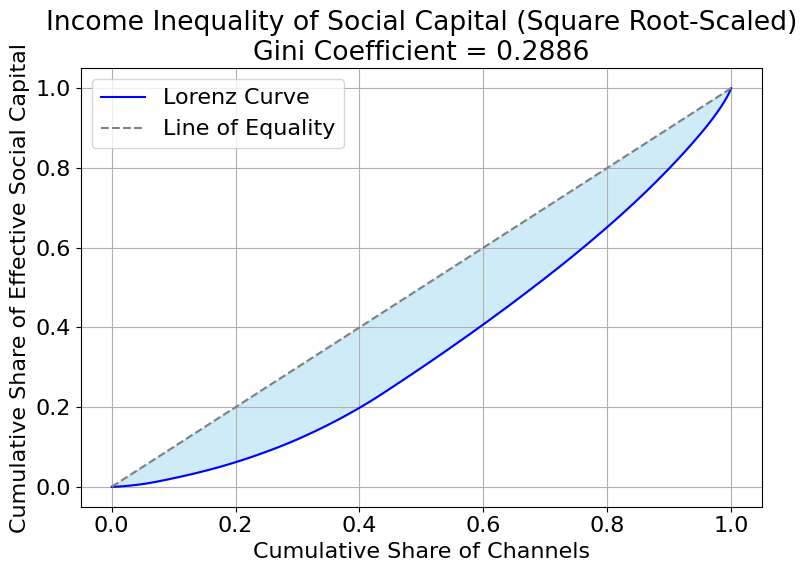

Gini Coefficient: 0.2886


In [71]:
plot('SCapital', 'Income Inequality of Social Capital (Square Root-Scaled)')

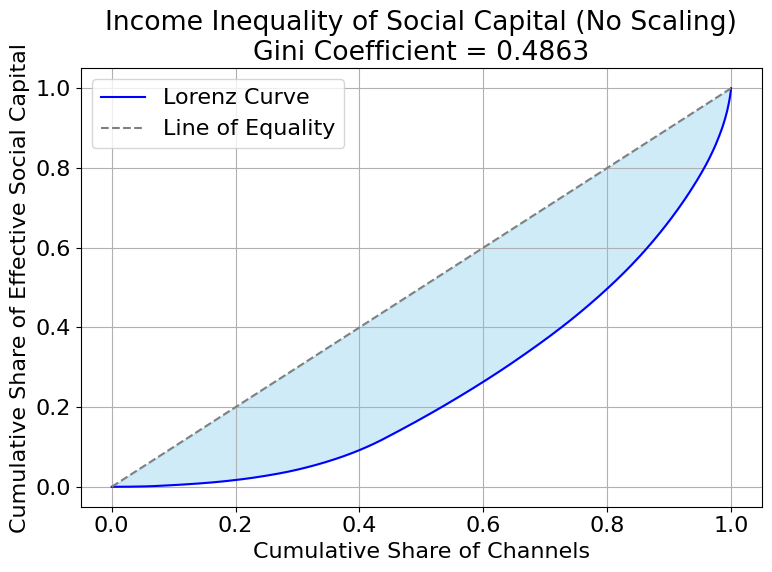

Gini Coefficient: 0.4863


In [75]:
plot('Subscribers', 'Income Inequality of Social Capital (No Scaling)')

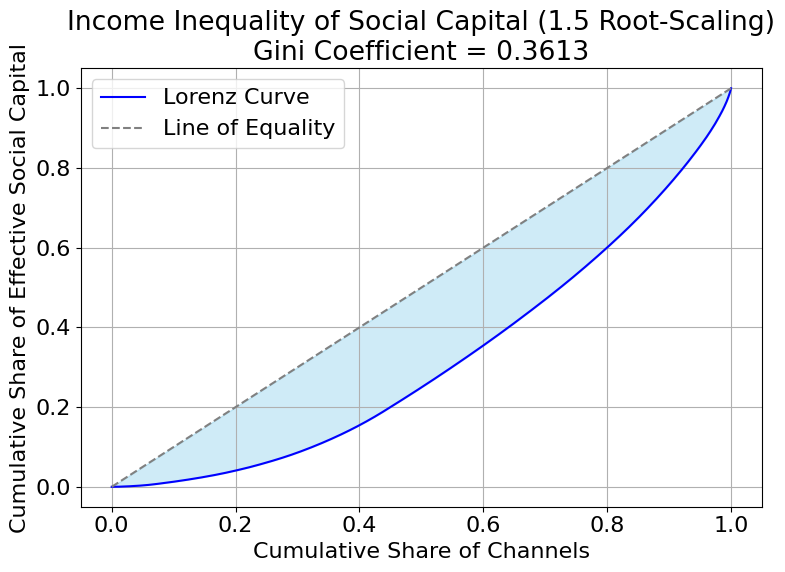

Gini Coefficient: 0.3613


In [73]:
plot('SCapital1-5', 'Income Inequality of Social Capital (1.5 Root-Scaling)')

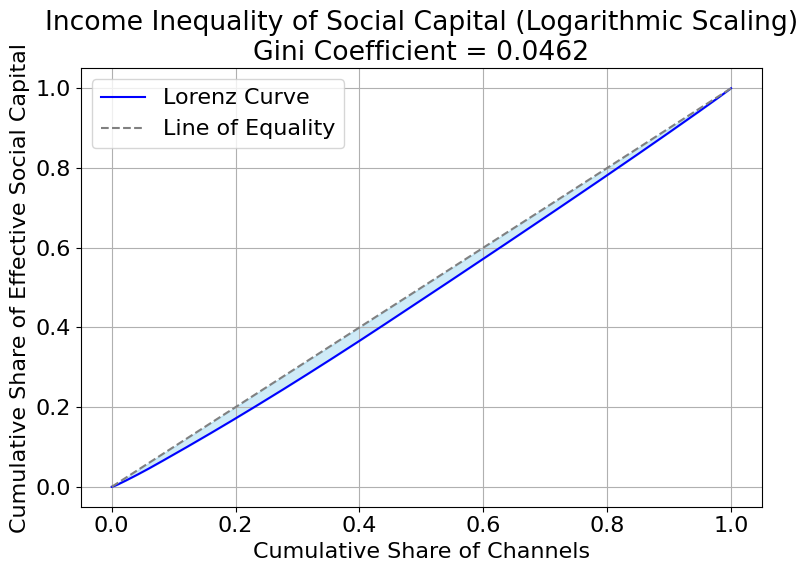

Gini Coefficient: 0.0462


In [74]:
plot('SCapitalLog2', 'Income Inequality of Social Capital (Logarithmic Scaling)')